importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import scipy.integrate as integrate
from scipy.optimize import fsolve
from matplotlib.collections import LineCollection

specifying Times New Roman font and to force that withing plotting commands

In [2]:
tnr = "Times New Roman"
plt.rcParams['font.sans-serif'] = tnr
plt.rcParams['font.family'] = tnr
params ={'mathtext.default':'regular'}    
plt.rcParams.update(params)

setting user defined parameters

In [4]:
R_star = 1.e7 # km
V_inf = 1700. # km/s
beta = 1.001
M_lossrate = 2*(10**(30))*1.e-6 # kg/s

R_shock = 2.5*R_star
T_star = 3.5

u_o = R_star/R_shock
maxratio = 8. # max ratio of r/R_star on the grid, so that the grid plotted are scaled by R_star
q = 0.

Ro = str(R_shock/R_star)
taustar = str(T_star)

setting up the grid

In [5]:
interval = 200
x = np.linspace(-maxratio, maxratio, interval)
y = np.linspace(-maxratio, maxratio, interval)   
X, Y = np.meshgrid(x, y)

function that computes radial velocity over terminal velocity on the grid

In [6]:
def f(x, y):
    r = np.sqrt(x**2+y**2)
    v = (1-1/r)**beta
    return (x/r)*v

function that computes the intensity proportional to density squared on the grid

In [7]:
def g(x, y):
    r = np.sqrt(x**2+y**2)
    v = (V_inf/R_star)*(1-1/r)**beta
    return -(np.log10((M_lossrate/(4*np.pi*(r**2)*v))**2))

convention_min_intensity = g(1.1, 0)

funtion that computes the optical depth

In [8]:
op = []
for i in (y):
    arr = []
    if i < -1 or i >1:
        for j in (x):
            arr.append(T_star*(integrate.quad(lambda a: 1/((a**2+i**2)*((1-1/np.sqrt(a**2+i**2))**beta)), -np.inf, j)[0]))
    if -1 <= i and i <= 1:
        for j in (x):
            if -np.sqrt(1-i**2) <= j:
                arr.append(np.inf)
            else:
                arr.append(T_star*(integrate.quad(lambda a: 1/((a**2+i**2)*((1-1/np.sqrt(a**2+i**2))**beta)), -np.inf, j)[0]))
    op.append(arr)
    
"""op_2 = []
for i in (y):
    arr = []
    if i < -1 or i >1:
        for j in (x):
            arr.append(T_star_2*(integrate.quad(lambda a: 1/((a**2+i**2)*((1-1/np.sqrt(a**2+i**2))**beta)), -np.inf, j)[0]))
    if -1 <= i and i <= 1:
        for j in (x):
            if -np.sqrt(1-i**2) <= j:
                arr.append(np.inf)
            else:
                arr.append(T_star_2*(integrate.quad(lambda a: 1/((a**2+i**2)*((1-1/np.sqrt(a**2+i**2))**beta)), -np.inf, j)[0]))
    op_2.append(arr)"""

'op_2 = []\nfor i in (y):\n    arr = []\n    if i < -1 or i >1:\n        for j in (x):\n            arr.append(T_star_2*(integrate.quad(lambda a: 1/((a**2+i**2)*((1-1/np.sqrt(a**2+i**2))**beta)), -np.inf, j)[0]))\n    if -1 <= i and i <= 1:\n        for j in (x):\n            if -np.sqrt(1-i**2) <= j:\n                arr.append(np.inf)\n            else:\n                arr.append(T_star_2*(integrate.quad(lambda a: 1/((a**2+i**2)*((1-1/np.sqrt(a**2+i**2))**beta)), -np.inf, j)[0]))\n    op_2.append(arr)'

luminosity over wavelength line profile

In [9]:
wavelength = np.linspace(-0.99999, 0.99999, interval)
luminosity = []
for i in (wavelength):
    u_x = 1-np.absolute(i)**(1/beta)
    u_crit = fsolve(lambda c: ((1-c)**(beta))*((1-c**2)**0.5)-np.absolute(i), 0.4)[0]
    if i < 0:
        if u_o < u_x:
            u_boundary = u_o
        else:
            u_boundary = u_x
    if i >= 0:
        if u_o < u_crit:
            u_boundary = u_o
        else:
            u_boundary = u_crit
    #p = (R_star/u)*(np.sqrt((1-u)**(2*beta)-i**2)/((1-u)**beta))
    #z = -R_star*i/(u*((1-u)**beta))
    #lum = integrate.quad(lambda u: ((1/u)**(-q)/((1-u)**(3*beta))*np.exp(-T_star*integrate.quad(lambda w: R_star/((p**2+w**2)*((1-R_star/np.sqrt(p**2+w**2))**beta)), z, 1.e3*R_star)[0])), 0, u_boundary)[0]
    lum = integrate.quad(lambda u: ((1/u)**(-q)/((1-u)**(3*beta))*np.exp(-T_star*integrate.quad(lambda w: R_star/((((R_star/u)*(np.sqrt((1-u)**(2*beta)-i**2)/((1-u)**beta)))**2+w**2)*((1-R_star/np.sqrt(((R_star/u)*(np.sqrt((1-u)**(2*beta)-i**2)/((1-u)**beta)))**2+w**2))**beta)), -R_star*i/(u*((1-u)**beta)), 1.e3*R_star)[0])), 0, u_boundary)[0]
    luminosity.append(lum)
luminosity = luminosity/np.max(luminosity)


"""luminosity_2 = []
for i in (wavelength):
    u_x = 1-np.absolute(i)**(1/beta)
    u_crit = fsolve(lambda c: ((1-c)**(beta))*((1-c**2)**0.5)-np.absolute(i), 0.4)[0]
    if i < 0:
        if u_o < u_x:
            u_boundary = u_o
        else:
            u_boundary = u_x
    if i >= 0:
        if u_o < u_crit:
            u_boundary = u_o
        else:
            u_boundary = u_crit
    #p = (R_star/u)*(np.sqrt((1-u)**(2*beta)-i**2)/((1-u)**beta))
    #z = -R_star*i/(u*((1-u)**beta))
    #lum = integrate.quad(lambda u: ((1/u)**(-q)/((1-u)**(3*beta))*np.exp(-T_star*integrate.quad(lambda w: R_star/((p**2+w**2)*((1-R_star/np.sqrt(p**2+w**2))**beta)), z, 1.e3*R_star)[0])), 0, u_boundary)[0]
    lum = integrate.quad(lambda u: ((1/u)**(-q)/((1-u)**(3*beta))*np.exp(-T_star_2*integrate.quad(lambda w: R_star/((((R_star/u)*(np.sqrt((1-u)**(2*beta)-i**2)/((1-u)**beta)))**2+w**2)*((1-R_star/np.sqrt(((R_star/u)*(np.sqrt((1-u)**(2*beta)-i**2)/((1-u)**beta)))**2+w**2))**beta)), -R_star*i/(u*((1-u)**beta)), 1.e3*R_star)[0])), 0, u_boundary)[0]
    luminosity_2.append(lum)
luminosity_2 = luminosity_2/np.max(luminosity_2)"""

'luminosity_2 = []\nfor i in (wavelength):\n    u_x = 1-np.absolute(i)**(1/beta)\n    u_crit = fsolve(lambda c: ((1-c)**(beta))*((1-c**2)**0.5)-np.absolute(i), 0.4)[0]\n    if i < 0:\n        if u_o < u_x:\n            u_boundary = u_o\n        else:\n            u_boundary = u_x\n    if i >= 0:\n        if u_o < u_crit:\n            u_boundary = u_o\n        else:\n            u_boundary = u_crit\n    #p = (R_star/u)*(np.sqrt((1-u)**(2*beta)-i**2)/((1-u)**beta))\n    #z = -R_star*i/(u*((1-u)**beta))\n    #lum = integrate.quad(lambda u: ((1/u)**(-q)/((1-u)**(3*beta))*np.exp(-T_star*integrate.quad(lambda w: R_star/((p**2+w**2)*((1-R_star/np.sqrt(p**2+w**2))**beta)), z, 1.e3*R_star)[0])), 0, u_boundary)[0]\n    lum = integrate.quad(lambda u: ((1/u)**(-q)/((1-u)**(3*beta))*np.exp(-T_star_2*integrate.quad(lambda w: R_star/((((R_star/u)*(np.sqrt((1-u)**(2*beta)-i**2)/((1-u)**beta)))**2+w**2)*((1-R_star/np.sqrt(((R_star/u)*(np.sqrt((1-u)**(2*beta)-i**2)/((1-u)**beta)))**2+w**2))**beta)), -R_

plotting

<ipython-input-6-cfa8969fd148>:3: RuntimeWarning: invalid value encountered in power
  v = (1-1/r)**beta


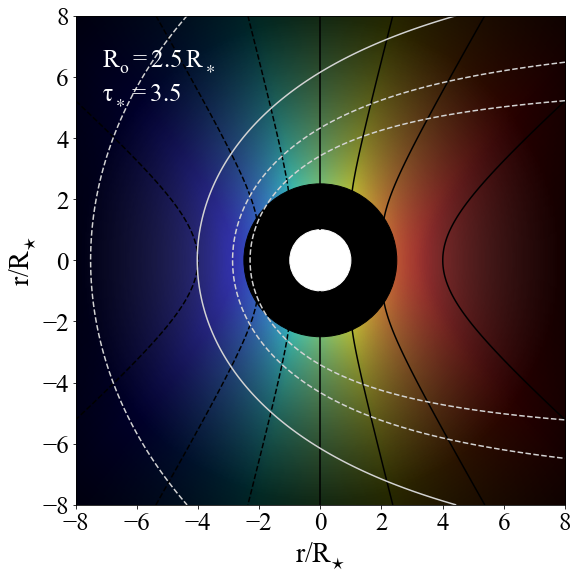

In [10]:
# setting up figure size and range

plt.figure(figsize = (15, 9))

plt.xlim(-maxratio, maxratio)
plt.ylim(-maxratio, maxratio)


# labeling axis and ticks

plt.xlabel(r'$r/R_{\star}$', fontsize = 27.5)
plt.ylabel(r'$r/R_{\star}$', fontsize = 27.5)

plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)


# drawing star and the stellar wind boundary

shock = plt.Circle((0, 0), R_shock/R_star, color='black')
plt.gca().add_patch(shock)

star = plt.Circle((0,0), 1, color = 'white')
plt.gca().add_patch(star)


# plotting redshift and contours

color = f(X, Y)
redshift_contour = plt.contour(X, Y, color, 7, colors = 'black')
redshift = plt.imshow(color, extent = [-maxratio, maxratio, -maxratio, maxratio], origin = 'lower', cmap = plt.cm.jet, alpha = 1.0)
#plt.clabel(plt.contour(X, Y, color))


# plotting log10(density^2)

alphas = Normalize(convention_min_intensity, g(maxratio, 0)+1, clip = True)(g(X, Y)) # setting up transparency as a function of -log10(density^2)
brightness = Normalize(convention_min_intensity, g(maxratio, 0), clip = True)(g(X, Y))
brightness = plt.cm.gray_r(brightness)
brightness[..., -1] = alphas

intensity = plt.imshow(brightness, extent = [-maxratio, maxratio, -maxratio, maxratio], origin = 'lower', cmap = plt.cm.gray_r)
#plt.clabel(plt.contour(X, Y, g(X, Y)))


# plotting optical depth contours

depth = plt.contour(x, y, op, levels = [0.5, 1.5, 2], colors = 'lightgray', linestyles='dashed')
depth = plt.contour(x, y, op, levels = [1], colors = 'lightgray')
#depth = plt.contour(x, y, op_2, levels = [1], colors = 'lightgray', linestyles='dashed')


# plotting windabsorption greyscale

#wa_min = np.exp(-T_star*(integrate.quad(lambda a: 1/((a**2+(maxratio)**2)*((1-1/np.sqrt(a**2+(maxratio)**2))**beta)), -np.inf, -maxratio)[0])) # minimum windabsorption at (-maxratio, maxratio)
#wa_max = np.exp(-T_star*(integrate.quad(lambda a: 1/((a**2+(R_shock/R_star)**2)*((1-1/np.sqrt(a**2+(R_shock/R_star)**2))**beta)), -np.inf, maxratio)[0])) # maximum windabsorption at (maxratio, R_shock/R_star)

#alphas_wa = Normalize(-wa_min, -wa_max, clip = True)(-np.exp(-np.asarray(op)))
#brightness_wa = Normalize(-wa_min, -wa_max, clip = True)(-np.exp(-np.asarray(op)))
#brightness_wa = plt.cm.gray_r(brightness_wa)
#brightness_wa[..., -1] = alphas_wa

#wind_absorption = plt.imshow(brightness_wa, extent = [-maxratio, maxratio, -maxratio, maxratio], origin = 'lower', cmap = plt.cm.gray_r)                   


# drawing intensity color bar

corrected_intensity_ticks = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1]
intensity_ticks = [-np.log10(1), -np.log10(0.8), -np.log10(0.6), -np.log10(0.4), -np.log10(0.2), -np.log10(0.1)]

#intensity_cb = plt.colorbar(intensity, ticks = intensity_ticks)
#intensity_cb.ax.set_yticklabels(corrected_intensity_ticks, fontsize = 14)
#intensity_cb.ax.set_ylabel('normalized intensity (arbitary units)', fontsize = 17)


# drawing redshift color bar

redshift_ticks = np.linspace(-1, 1, 9)

#redshift_cb = plt.colorbar(redshift, ticks = redshift_ticks)
#redshift_cb.ax.set_yticklabels(redshift_ticks, fontsize = 14)
#redshift_cb.ax.set_ylabel(r'$v_r/v_{\infty}$', fontsize = 17)

#plt.savefig('wind_contour_'+Ro+'_'+taustar+'.png', bbox_inches = 'tight')

plt.figtext(0.31, 0.8, r'$R_o = %s \,R_\ast$' % Ro, fontsize = 25, color = 'white')
plt.figtext(0.31, 0.75, r'$\tau_\ast = %s$' % taustar, fontsize = 25, color = 'white')

plt.savefig('p7_wind.png', dpi = 400, bbox_inches = 'tight')
plt.show()


writing normalized radial velocity and luminosity into a txt file

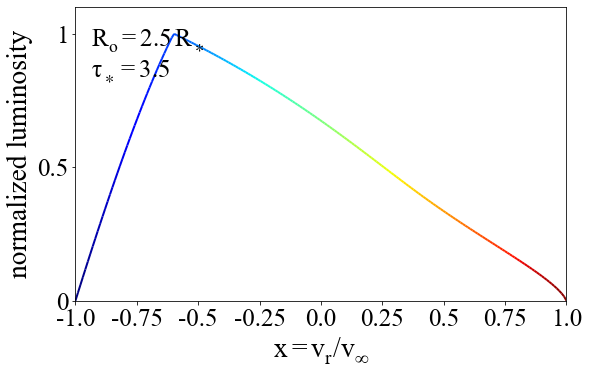

In [11]:
# plotting line profile

points = np.array([wavelength, luminosity]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

"""points_2 = np.array([wavelength, luminosity_2]).T.reshape(-1, 1, 2)
segments_2 = np.concatenate([points_2[:-1], points_2[1:]], axis=1)"""

fig, ax = plt.subplots(figsize = (8.8, 5.4))

lc = LineCollection(segments, cmap = plt.cm.jet, norm = plt.Normalize(wavelength.min(), wavelength.max(), clip = True), alpha = 1.0)
#ax.plot(wavelength, luminosity, 'k')
"""lc_2 = LineCollection(segments_2, cmap = plt.cm.jet, norm = plt.Normalize(wavelength.min(), wavelength.max(), clip = True))"""

lc.set_array(wavelength)
lc.set_linewidth(2)
ax.add_collection(lc)

"""lc_2.set_array(wavelength)
lc_2.set_linewidth(2)
lc_2.set_linestyles(':')
ax.add_collection(lc_2)"""

ax.set_ylim(0.00, np.max(luminosity)*1.1)
ax.set_xlim(-1, 1)

ax.set_xlabel(r'$x = v_r/v_{\infty}$', fontsize=27.5)
ax.set_ylabel('normalized luminosity', fontsize=27.5)
ax.set_xticks(redshift_ticks)
ax.set_xticklabels(redshift_ticks, fontsize = 25)
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize = 25)

#plt.savefig('line_profile_'+Ro+'_'+taustar+'.png', bbox_inches = 'tight')
plt.figtext(0.15, 0.78, r'$R_o = %s \,R_\ast$' % Ro, fontsize = 25, color = 'k')
plt.figtext(0.15, 0.7, r'$\tau_\ast = %s$' % taustar, fontsize = 25, color = 'k')
plt.savefig('p7_line.png', dpi = 400, bbox_inches = 'tight')
plt.show()

In [ ]:
def writelum(x, y):
    '''takes two list x, y and writes them into a txt file.'''
    txt = open('line_profile_'+Ro+'_'+taustar+'.txt', 'w')
    for i in range(len(x)):
        txt.write(str(x[i])+' '+str(y[i])+'\n')

#writelum(wavelength, luminosity)